<pre style="text-align: right; width: 100%; font-size: 0.75em; line-height: 0.75em;">
+ ------------------------- + <br>
| 20/04/2025                | <br>
| Héctor Tablero Díaz       | <br>
| Álvaro Martínez Gamo      | <br>
+ ------------------------- + 
</pre>

# **Noise Schedulers**

We first have to import the necessary code:

In [1]:
import sys
sys.path.append('./..')

import os

import matplotlib.pyplot as plt
import torch
from torch.utils.data import Subset
from torchvision import datasets
from torchvision.transforms import ToTensor

from image_gen import GenerativeModel
from image_gen.samplers import EulerMaruyama
from image_gen.diffusion import VariancePreserving
from image_gen.noise import LinearNoiseSchedule, CosineNoiseSchedule

from image_gen.viualization import display_images, create_evolution_widget

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\samplers\euler_maruyama.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### **Schedule Visualization**

The schedules determine how much noise will be added over time. We can preview their impact by plotting the result of their `__call__` method:

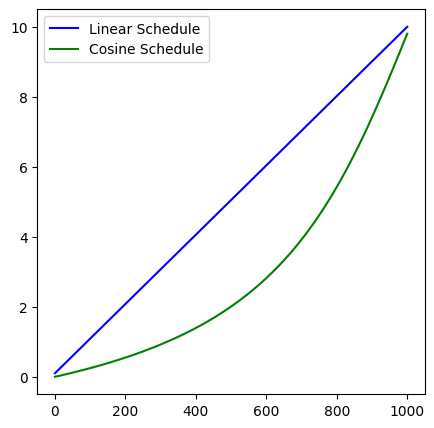

In [2]:
max_t = 1000.0
beta_max = 10.0
x = torch.linspace(0, max_t, 100)

plt.figure(figsize=(5, 5))

lin_schedule = LinearNoiseSchedule(max_t=max_t, beta_max=beta_max)
plt.plot(x, lin_schedule(x), label='Linear Schedule', color='blue')

cos_schedule = CosineNoiseSchedule(max_t=max_t, beta_max=beta_max)
plt.plot(x, cos_schedule(x), label='Cosine Schedule', color='green')

plt.legend()
plt.show()

### **Image Generation**

Noise schedules are compatible with the default classes of `VariancePreserving` and `SubVariancePreserving`.

We can see how the schedules affect the results by training a model with each, and running them with the same seed:

In [3]:
# Set up the common variables
epochs = 50
digit = 3

seed = 42

In [4]:
# Load the dataset
data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

# Select a subset to speed up the training process
indices_digit = torch.where(data.targets == digit)[0]
data = Subset(data, indices_digit)

**Linear:**

In [ ]:
filename = f'saved_models/mnist_{digit}_vp-lin_euler_{epochs}e.pth'

model = GenerativeModel(
    diffusion=VariancePreserving,
    sampler=EulerMaruyama,
    noise_schedule=LinearNoiseSchedule
)

# TODO: Cambiar esto para que verifique que el archivo existe usando el módulo de os o alguna forma menos cutre q un try-except
if os.path.isfile(filename):
    model.load(filename)
else:
    model.train(data, epochs=epochs)
    # Tip: Save the models for them to be accessible through the dashboard
    model.save(filename)

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\base.py:84: UserWarning: VariancePreserving does not require a noise schedule. The provided noise schedule will be ignored.
  warnings.warn(


Generating:   0%|          | 0/500 [00:00<?, ?it/s]

Step 0: t=1.000, mean=0.003, std=0.999
Step 50: t=0.900, mean=0.031, std=1.005
Step 100: t=0.800, mean=0.031, std=1.003
Step 150: t=0.700, mean=0.055, std=0.993
Step 200: t=0.600, mean=0.055, std=0.982
Step 250: t=0.501, mean=0.087, std=0.968
Step 300: t=0.401, mean=0.112, std=0.911
Step 350: t=0.301, mean=0.128, std=0.804
Step 400: t=0.201, mean=0.146, std=0.632
Step 450: t=0.101, mean=0.160, std=0.439


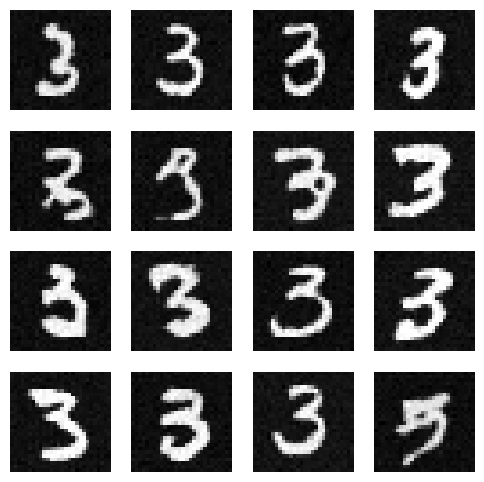

In [6]:
n_images = 16
samples = model.generate(n_images, seed=seed)
display_images(samples)

Generating:   0%|          | 0/500 [00:00<?, ?it/s]

Step 0: t=1.000, mean=0.014, std=0.939
Step 1: t=0.998, mean=0.019, std=0.928
Step 2: t=0.996, mean=0.015, std=0.939
Step 3: t=0.994, mean=0.017, std=0.945
Step 4: t=0.992, mean=0.010, std=0.948
Step 5: t=0.990, mean=0.020, std=0.948
Step 6: t=0.988, mean=0.023, std=0.952
Step 7: t=0.986, mean=0.020, std=0.962
Step 8: t=0.984, mean=0.015, std=0.969
Step 9: t=0.982, mean=0.018, std=0.971
Step 10: t=0.980, mean=0.021, std=0.972
Step 11: t=0.978, mean=0.014, std=0.978
Step 12: t=0.976, mean=0.011, std=0.998
Step 13: t=0.974, mean=0.015, std=0.994
Step 14: t=0.972, mean=0.026, std=0.999
Step 15: t=0.970, mean=0.031, std=1.003
Step 16: t=0.968, mean=0.030, std=0.994
Step 17: t=0.966, mean=0.026, std=0.997
Step 18: t=0.964, mean=0.022, std=1.006
Step 19: t=0.962, mean=0.024, std=0.999
Step 20: t=0.960, mean=0.022, std=0.997
Step 21: t=0.958, mean=0.026, std=1.003
Step 22: t=0.956, mean=0.032, std=1.005
Step 23: t=0.954, mean=0.029, std=0.988
Step 24: t=0.952, mean=0.021, std=0.982
Step 25: t

'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      

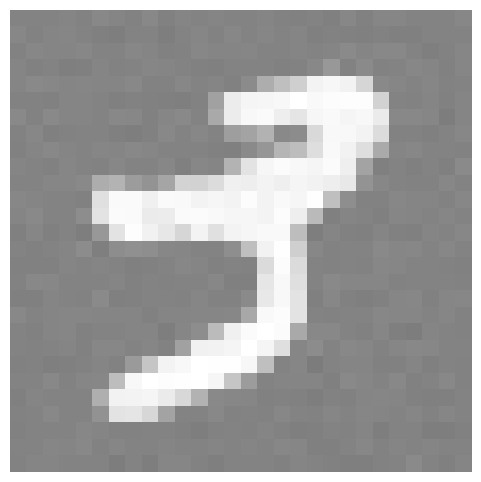

In [7]:
create_evolution_widget(model, seed=seed)

**Cosine:**

In [8]:
filename = f'saved_models/mnist_{digit}_vp-cos_euler_{epochs}e.pth'

model = GenerativeModel(
    diffusion=VariancePreserving,
    sampler=EulerMaruyama,
    noise_schedule=CosineNoiseSchedule
)

# TODO: Cambiar esto para que verifique que el archivo existe usando el módulo de os o alguna forma menos cutre q un try-except
try:
    model.load(filename)
except:
    model.train(data, epochs=epochs)
    # Tip: Save the models for them to be accessible through the dashboard
    model.save(filename)

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\base.py:84: UserWarning: VariancePreserving does not require a noise schedule. The provided noise schedule will be ignored.
  warnings.warn(


Training:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/192 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
n_images = 16
samples = model.generate(n_images, seed=seed)
display_images(samples)

In [ ]:
create_evolution_widget(model, seed=seed)

### **Default Schedule Recommendations**

The `GenerativeModel` class can also receive an initialized noise scheduler class.

This can be used to change the outcome of the generation:

In [ ]:
model = GenerativeModel(
    diffusion=VariancePreserving,
    sampler=EulerMaruyama,
    noise_schedule=LinearNoiseSchedule(max_t=1000.0, beta_min=0.0001, beta_max=20.0)
)

In [ ]:
model = GenerativeModel(
    diffusion=VariancePreserving,
    sampler=EulerMaruyama,
    noise_schedule=CosineNoiseSchedule(max_t=1000.0, s=0.008, beta_max=20.0)
)

Where:
- `max_t` is duration of the generation, since it always starts at t=0.0
- `beta_max` is the highest value that the scheduler will output, which happens at t=t_max in the default models
- `beta_min` is the lowest value that the scheduler will output, which happens at t=0.0 in the default models
- `s` is a parameter that controls the curve of the cosine scheduler

Below is an interactive demonstration of how the parameters affect the curves:

In [ ]:
# TODO: Crear la demostración interactiva (igual que la primera gráfica de este notebook pero permitiendo cambiar los parámetros)

### **Creating Custom Classes**

Custom noise schedulers can be created by inheriting from the class `BaseNoiseSchedule`. They must implement a `__call__` function.

It is currently not supported to load models with a custom schedule, but it is highly recommended that they implement a `config` method for future updates.

**Exponential Scheduler:**

In [ ]:
from torch import Tensor
from image_gen.noise import BaseNoiseSchedule

class ExponentialNoiseSchedule(BaseNoiseSchedule):
    def __init__(self, max_t: float = 1000.0, beta_min: float = 0.1, beta_max: float = 20.0, e: float = 2.0):
        super().__init__(max_t)
        self.beta_min = beta_min
        self.beta_max = beta_max
        self.e = e

    def __call__(self, t: Tensor) -> Tensor:
        t_norm = (t / self.max_t).clamp(0.0, 1.0)
        return self.beta_min + t_norm ** self.e * (self.beta_max - self.beta_min)

    def config(self) -> dict:
        return {
            "max_t": self.max_t,
            "beta_min": self.beta_min,
            "beta_max": self.beta_max,
            "e": self.e
        }

**Usage:**

In [ ]:
model = GenerativeModel(
    diffusion=VariancePreserving,
    sampler=EulerMaruyama,
    noise_schedule=ExponentialNoiseSchedule
)

**Curve Comparison:**

In [ ]:
max_t = 1000.0
beta_max = 10.0
x = torch.linspace(0, max_t, 100)

plt.figure(figsize=(5, 5))

lin_schedule = LinearNoiseSchedule(max_t=max_t, beta_max=beta_max)
plt.plot(x, lin_schedule(x), label='Linear Schedule', color='blue', alpha=0.5)

cos_schedule = CosineNoiseSchedule(max_t=max_t, beta_max=beta_max)
plt.plot(x, cos_schedule(x), label='Cosine Schedule', color='green', alpha=0.5)

exp_schedule = ExponentialNoiseSchedule(max_t=max_t, beta_max=beta_max, e=2.0)
plt.plot(x, exp_schedule(x), label='Exponential Schedule (e = 2)', color='purple')

exp_schedule = ExponentialNoiseSchedule(max_t=max_t, beta_max=beta_max, e=3.0)
plt.plot(x, exp_schedule(x), label='Exponential Schedule (e = 3)', color='violet')

exp_schedule = ExponentialNoiseSchedule(max_t=max_t, beta_max=beta_max, e=5.0)
plt.plot(x, exp_schedule(x), label='Exponential Schedule (e = 5)', color='pink')

plt.legend()
plt.show()